# Plot detection limits in terms of contrast and mass for GJ 436
_Written 2023-01-23 (Célia Desgrange @MPIA & @IPAG)_ 

# Plot detection limits GJ 436

In [2]:
from import_functions_generic import *
#infolder = '/Users/desgranc/Documents/work/GitHub_clone/projects/Medres/'
#sys.path.append(infolder+'run_simulations')
#from functions_simues_detlim import *

In [3]:
plt.style.use('classic')  
mpl.rc('image', cmap='viridis')#, origin='lower')
#mpl.rc('text', usetex=True)
#mpl.rc(mathtext.fontset = 'stix')


rcParams.update({'font.size': 14,  'axes.labelsize' : 14, 'legend.fontsize' : 12,
"font.family": "serif", 'text.usetex' : True, "font.serif": [], "font.sans-serif": [],
'legend.handlelength': 1.5, 'legend.borderaxespad' : 1, 'legend.columnspacing' : 1, 'legend.handletextpad' : 0.5})

rcParams['mathtext.fontset'] = 'stix'

In [5]:
# Create folder in which the figures are going to be saved. 
L = time.localtime()
date = "{}-{}-{}".format(L[0],L[1],L[2],L[3],L[4],L[5])

target = 'HD120326' 
saving_dir = 'figs/fig_v{}/'.format(date)

os.makedirs(saving_dir, exist_ok=True)

In [6]:

color_line_planet=np.array([0.1,0.1,0.1])*5

## Physical Parameters

In [8]:
d = 113 #pc


## Figures

### Plot contrast curve

In [9]:
COLORS = ['mediumpurple','crimson','navy',
          'darkblue', 'limegreen',  'darksalmon',
          'darkred' ,'lightgray', 'lightsalmon', 'purple', 'crimson', 'firebrick' ,'blue',
          'lightgreen', 'darkgreen', 'lime', 'limegreen' ]


LS = ['--','--','-','-']

# HST STIS CCD

In [13]:
folder = 'files/'
fn = 'cc.csv'
path = folder+fn
dF = pd.read_csv(path, sep='\t')
dF.head()

,"r("")",Med.Contr/px,err_Med.Contr/px
0,0.225,0.001038,0.000024
1,0.275,0.000599,0.000117
2,0.325,0.000481,0.000091
3,0.375,0.000342,0.000078
4,0.425,0.000251,0.000040


In [25]:
colname_x = dF.columns[0]
colname_y = dF.columns[1]
colname_yerr = dF.columns[2]

convert_unit_x = 1

No handles with labels found to put in legend.


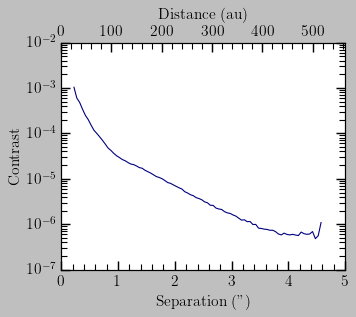

In [32]:
suffix = '_HST'
LS = ['-', ':','--']
# Figure
fig, ax = plt.subplots(1,1, figsize=(5,4))
fig.subplots_adjust(top=0.85, right=0.85, bottom=0.14, left=0.14)


def au2sep(sep):
    return sep*d#*1e-3

def convert_ax_sep_to_au(ax):
    y1, y2 = ax.get_xlim()
    ax1.set_xlim(au2sep(y1), au2sep(y2))
    ax1.figure.canvas.draw()
    return

ax1 = ax.twiny()
ax.callbacks.connect("xlim_changed", convert_ax_sep_to_au)


ax1.set_xlabel('Distance (au)')
ax.set_xlabel('Separation (")')
ax.set_ylabel('Contrast')

#ax2.set_yscale('log')
ax.set_yscale('log')
#ax.set_scale('log')
#ax.set_ylim([1, 100])
#ax.set_xlim([0, 4000])
ylim_max = ax.get_ylim()[-1]

i = 0 
X, Y = np.array(dF[colname_x])*convert_unit_x, np.array(dF[colname_y])
ax.plot(X,Y, ls=LS[i], color=COLORS[2+i])#, label=LABELS[i])
    
#ax.invert_yaxis()

ax.legend(frameon=False, loc=1, numpoints=1)
mise_en_page(ax, x_min_step=0.2, x_maj_step=1, x_step=1,  y_step=0)
mise_en_page(ax1, x_min_step=20, x_maj_step=100, x_step=1)
#mise_en_page(ax2, x_min_step=0, x_maj_step=5, x_step=0)

namesave = target + '_detlim_mass_curve' + suffix
plt.savefig(saving_dir + namesave + '.pdf')
#plt.savefig(saving_dir + namesave + '.png', dpi=300)
plt.show()

# JWST MIRI

##### if needed, save .json files into DataFrames

In [23]:
filts = ['1065', '1140', '1550']
path_miri = '/Users/desgranc/Documents/work/GitHub_clone/projects/proposal/GJ436/Pancake/GJ436_HD101151_300sec/results/'
FNs = ['Target-F{}C-FQPM{}-RDI-nb25a1s1m1-KLmodes-all_CURVES'.format(filt, filt) for filt in filts]
ext = '.json'
for k, fn in enumerate(FNs):
    # One contrast curve
    path = path_miri + fn + ext
    with open(path) as json_file:
        json_data = json.load(json_file)
        #print(json_data)

    dF = pd.DataFrame({COLS[0]: json_data[COLS[0]],
              COLS[1]: json_data[COLS[1]],
              COLS[2]: json_data[COLS[2]],
              COLS[3]: json_data[COLS[3]]
             })
    dF.to_csv(path_nircam + fn + '.csv', sep=',', index=None)

#### Open functions with mass

In [12]:
# SPHERE 
#path_nircam = 'contrast_JWST/'
import json
path_miri  = '/Users/desgranc/Documents/work/GitHub_clone/projects/proposal/GJ436/Pancake/GJ436_HD101151_300sec/results/'
filts = ['1065', '1140', '1550']
FNs = ['mass_Target-F{}C-FQPM{}-RDI-nb25a1s1m1-KLmodes-all_CURVES'.format(filt, filt) for filt in filts]

LABELS_MIRI= ['JWST-MIRI-F'+filt+'C' for filt in filts]
LABELS=np.copy(LABELS_MIRI)

dFs_miri = [pd.read_csv(path_miri + fn + ext, sep=',') for fn in FNs]
#dFs_miri[1]['mass']#.head()

## Mass

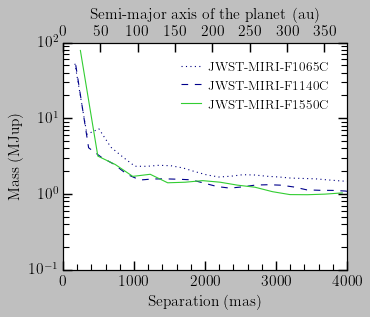

# NaCo 
## Load NaCo data

In [14]:
# SPHERE 
path_naco = 'contrast_NaCo/'

fn_naco_mass='detectionLimits_NaCo_Vincent.txt'

dF_NACO = np.loadtxt(path_naco+fn_naco_mass, skiprows = 2,
                    dtype={'names': ('sma','lim'),'formats': (float, float)})

AU_NACO   = dF_NACO['sma']
SEP_NACO  = dF_NACO['sma']/d
MASS_NACO = dF_NACO['lim']

## Mass curve 

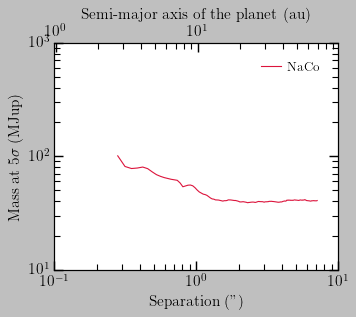

In [15]:
# Figure
suffix = '_NaCo'
fig, ax = plt.subplots(1,1, figsize=(5,4))
fig.subplots_adjust(top=0.85, right=0.85, bottom=0.14, left=0.14)

def mag2contr(mag):
    '''
    Convert magnitude 'mag' to contrast.
    '''
    return 10**(-mag/2.5)

def convert_ax_mag_to_contr(ax):
    '''
    Add to the already defined axis 'ax' a second vertical axis corresponding 
    to the contrast.
    Require the funtion 'mag2contr'.
    '''
    x1, x2 = ax.get_ylim()
    ax2.set_ylim(mag2contr(x1), mag2contr(x2))
    ax2.figure.canvas.draw()
    return

def au2sep(sep):
    return sep*9.78#*1e-3

def convert_ax_sep_to_au(ax):
    y1, y2 = ax.get_xlim()
    ax1.set_xlim(au2sep(y1), au2sep(y2))
    ax1.figure.canvas.draw()
    return

ax1 = ax.twiny()
ax.callbacks.connect("xlim_changed", convert_ax_sep_to_au)

#ax2= ax.twinx()
#ax.callbacks.connect("ylim_changed", convert_ax_mag_to_contr)

ax1.set_xlabel('Semi-major axis of the planet (au)')
ax.set_xlabel('Separation (")')
#ax2.set_ylabel('Contrast at $4.8 \mu$m (3$\sigma$)')
#ax.set_ylabel('Relative Apparent Magnitude at $4.8 \mu$m (3$\sigma$)')
ax.set_ylabel('Mass at 5$\sigma$ (MJup)')

ax.set_yscale('log')
ax1.set_xscale('log')
ax.set_xscale('log')
#ax.set_ylim([0.1, 100])
#ax.set_xlim([0, 1000])
ylim_max = ax.get_ylim()[-1]

ax.plot(SEP_NACO, MASS_NACO, ls='-', color=COLORS[10], label='NaCo')

ax.legend(frameon=False, loc=0, numpoints=1)
mise_en_page(ax, x_min_step=50, x_maj_step=200, x_step=0, y_min_step=0.2, y_maj_step=1, y_step=0)
mise_en_page(ax1, x_min_step=5, x_maj_step=20, x_step=0)
#mise_en_page(ax2, x_min_step=0, x_maj_step=5, x_step=0)

namesave = target + '_detlim_mass_curve' + suffix
plt.savefig(saving_dir + namesave + '.pdf')
#plt.savefig(saving_dir + namesave + '.png', dpi=300)
plt.show()

# SPHERE 
## Load SPHERE data

In [16]:
# SPHERE 
path_sphere = 'contrast_SPHERE/'

fn_sphere_mass = 'GJ436_mass_SPHERE_predict_newage_atmo_Elisabeth.dat'

dF_SPHERE = pd.read_csv(path_sphere+fn_sphere_mass, sep=',', comment='#')
MASS_SPHERE = np.array(dF_SPHERE.iloc[:,1]).astype(float)
SEP_SPHERE = np.array(dF_SPHERE.iloc[:,0]).astype(float)

cond = SEP_SPHERE > 0.100
SEP_SPHERE, MASS_SPHERE =  SEP_SPHERE[cond], MASS_SPHERE[cond]

## Mass curve

In [17]:
suffix = '_SPHERE'

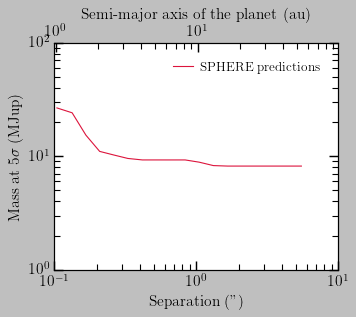

In [18]:
# Figure
fig, ax = plt.subplots(1,1, figsize=(5,4))
fig.subplots_adjust(top=0.85, right=0.85, bottom=0.14, left=0.14)

def mag2contr(mag):
    '''
    Convert magnitude 'mag' to contrast.
    '''
    return 10**(-mag/2.5)

def convert_ax_mag_to_contr(ax):
    '''
    Add to the already defined axis 'ax' a second vertical axis corresponding 
    to the contrast.
    Require the funtion 'mag2contr'.
    '''
    x1, x2 = ax.get_ylim()
    ax2.set_ylim(mag2contr(x1), mag2contr(x2))
    ax2.figure.canvas.draw()
    return

def au2sep(sep):
    return sep*9.78#*1e-3

def convert_ax_sep_to_au(ax):
    y1, y2 = ax.get_xlim()
    ax1.set_xlim(au2sep(y1), au2sep(y2))
    ax1.figure.canvas.draw()
    return

ax1 = ax.twiny()
ax.callbacks.connect("xlim_changed", convert_ax_sep_to_au)

#ax2= ax.twinx()
#ax.callbacks.connect("ylim_changed", convert_ax_mag_to_contr)

ax1.set_xlabel('Semi-major axis of the planet (au)')
ax.set_xlabel('Separation (")')
#ax2.set_ylabel('Contrast at $4.8 \mu$m (3$\sigma$)')
#ax.set_ylabel('Relative Apparent Magnitude at $4.8 \mu$m (3$\sigma$)')
ax.set_ylabel('Mass at 5$\sigma$ (MJup)')

ax.set_yscale('log')
ax1.set_xscale('log')
ax.set_xscale('log')
#ax.set_ylim([0.1, 100])
#ax.set_xlim([0, 1000])
ylim_max = ax.get_ylim()[-1]

ax.plot(SEP_SPHERE, MASS_SPHERE, ls='-', color=COLORS[10], label='SPHERE predictions')

ax.legend(frameon=False, loc=0, numpoints=1)
mise_en_page(ax, x_min_step=50, x_maj_step=200, x_step=0, y_min_step=0.2, y_maj_step=1, y_step=0)
mise_en_page(ax1, x_min_step=5, x_maj_step=20, x_step=0)
#mise_en_page(ax2, x_min_step=0, x_maj_step=5, x_step=0)

namesave = target + '_detlim_mass_curve' + suffix
plt.savefig(saving_dir + namesave + '.pdf')
#plt.savefig(saving_dir + namesave + '.png', dpi=300)
plt.show()

# Comparison JWST-NIRCAM, JWST-MIRI versus SPHERE, NACO

## Contrast

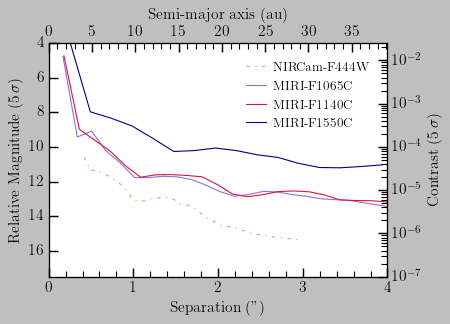

In [39]:
suffix = '_comparison_all'

# Figure
fig, ax = plt.subplots(1,1, figsize=(5.5,4))

def mJup2mEarth(mass):
    '''
    Convert magnitude 'mag' to contrast.
    '''
    return mass*317.8

def convert_ax_mJup_to_mEarth(ax):
    '''
    Add to the already defined axis 'ax' a second vertical axis corresponding 
    to the contrast.
    Require the funtion 'mag2contr'.
    '''
    x1, x2 = ax.get_ylim()
    ax2.set_ylim(mJup2mEarth(x1),mJup2mEarth(x2))
    ax2.figure.canvas.draw()
    return

def au2sep(sep):
    return sep*9.78#*1e-3

def convert_ax_sep_to_au(ax):
    y1, y2 = ax.get_xlim()
    ax1.set_xlim(au2sep(y1), au2sep(y2))
    ax1.figure.canvas.draw()
    return


def mag2contr(mag):
    '''
    Convert magnitude 'mag' to contrast.
    '''
    return 10**(-mag/2.5)

def convert_ax_mag_to_contr(ax):
    '''
    Add to the already defined axis 'ax' a second vertical axis corresponding 
    to the contrast.
    Require the funtion 'mag2contr'.
    '''
    x1, x2 = ax.get_ylim()
    ax2.set_ylim(mag2contr(x1), mag2contr(x2))
    ax2.figure.canvas.draw()
    return


ax1 = ax.twiny()
ax.callbacks.connect("xlim_changed", convert_ax_sep_to_au)

ax2= ax.twinx()
ax.callbacks.connect("ylim_changed",  convert_ax_mag_to_contr)

ax1.set_xlabel('Semi-major axis (au)')
ax.set_xlabel('Separation (")')
#ax2.set_ylabel('Contrast at $4.8 \mu$m (3$\sigma$)')
#ax.set_ylabel('Relative Apparent Magnitude at $4.8 \mu$m (3$\sigma$)')
ax2.set_ylabel('Contrast ($5\,\sigma$)')
ax.set_ylabel('Relative Magnitude ($5\,\sigma$)')

ax2.set_yscale('log')
#ax.set_xscale('log')
#ax1.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylim([4, 17.5])
ax.set_xlim([0, 4])
ylim_max = ax.get_ylim()[-1]

if 0:
    # repère Jupiter
    xtext_deb = 0.055; fs=10
    ax.plot(ax.get_xlim(), [1,1], ls=':', color=color_line_planet)
    ax.text(xtext_deb, 1.2, 'Jupiter', color=color_line_planet, fontsize=fs)

    MSaturn = 95/318
    ax.plot(ax.get_xlim(), [MSaturn,MSaturn], ls=':', color=color_line_planet)
    ax.text(xtext_deb, MSaturn*1.2, 'Saturn', color=color_line_planet, fontsize=fs)

    MNeptune = 18/318
    ax.plot(ax.get_xlim(), [MNeptune,MNeptune], ls=':', color=color_line_planet)
    ax.text(xtext_deb, MNeptune*1.2, 'Neptune', color=color_line_planet, fontsize=fs)


for i, dF in enumerate(dFs_nircam):
    X, Y = np.array(dF['separation_arcsec']), np.array(dF['relmag'])
    cond = X >0.4
    X, Y = X[cond], Y[cond]
    lab = LABELS_NIRCAM[i]
    lab = lab[5:]
    if i == 0: continue
    ax.plot(X,Y, ls='-.', color=COLORS[4+i], label=lab)


for i, dF in enumerate(dFs_miri):
    X, Y = np.array(dF['separation_arcsec']), np.array(dF['relmag'])
    lab = LABELS_MIRI[i]
    lab = lab[5:]
    ax.plot(X,Y, ls='-', color=COLORS[i], label=lab)
    
    
ax.invert_yaxis()    
#ax.plot(SEP_SPHERE, MASS_SPHERE, ls=':', color='black', label='SPHERE predic.')
#ax.plot(SEP_NACO, MASS_NACO, ls='--', color='black', label='NaCo')

ax.legend(frameon=False, loc='upper right', numpoints=1, ncol=1)
mise_en_page(ax, x_min_step=0.2, x_maj_step=1, x_step=1, 
             y_min_step=0.2, y_maj_step=1, y_step=0)
mise_en_page(ax1, x_min_step=1, x_maj_step=5, x_step=1)
try: 
    mise_en_page(ax2, x_min_step=0, x_maj_step=5, x_step=0)
except: pass

fig.subplots_adjust(top=0.87, right=0.87, bottom=0.14, left=0.1)


namesave = target + '_detlim_contrast_curve' + suffix
plt.savefig(saving_dir + namesave + '.pdf')
#plt.savefig(saving_dir + namesave + '.png', dpi=300)
plt.show()


## Mass

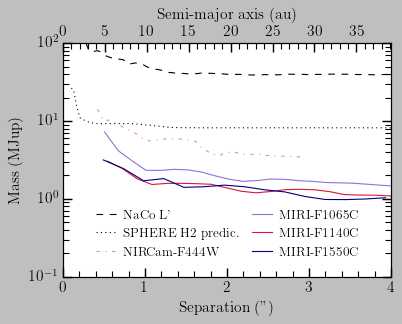

In [46]:
suffix = '_comparison_all'

# Figure
fig, ax = plt.subplots(1,1, figsize=(5,4))

def mJup2mEarth(mass):
    '''
    Convert magnitude 'mag' to contrast.
    '''
    return mass*317.8

def convert_ax_mJup_to_mEarth(ax):
    '''
    Add to the already defined axis 'ax' a second vertical axis corresponding 
    to the contrast.
    Require the funtion 'mag2contr'.
    '''
    x1, x2 = ax.get_ylim()
    ax2.set_ylim(mJup2mEarth(x1),mJup2mEarth(x2))
    ax2.figure.canvas.draw()
    return

def au2sep(sep):
    return sep*9.78#*1e-3

def convert_ax_sep_to_au(ax):
    y1, y2 = ax.get_xlim()
    ax1.set_xlim(au2sep(y1), au2sep(y2))
    ax1.figure.canvas.draw()
    return

ax1 = ax.twiny()
ax.callbacks.connect("xlim_changed", convert_ax_sep_to_au)

#ax2= ax.twinx()
#ax.callbacks.connect("ylim_changed", convert_ax_mJup_to_mEarth)

ax1.set_xlabel('Semi-major axis (au)')
ax.set_xlabel('Separation (")')
#ax2.set_ylabel('Contrast at $4.8 \mu$m (3$\sigma$)')
#ax.set_ylabel('Relative Apparent Magnitude at $4.8 \mu$m (3$\sigma$)')
ax.set_ylabel('Mass (MJup)')
try: 
    ax2.set_ylabel('Mass (MEarth)')
    ax2.set_yscale('log')
except: pass
#ax.set_xscale('log')
#ax1.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.1, 100])
ax.set_xlim([0, 4])
ylim_max = ax.get_ylim()[-1]

if 0:
    # repère Jupiter
    xtext_deb = 0.055; fs=10
    ax.plot(ax.get_xlim(), [1,1], ls=':', color=color_line_planet)
    ax.text(xtext_deb, 1.2, 'Jupiter', color=color_line_planet, fontsize=fs)

    MSaturn = 95/318
    ax.plot(ax.get_xlim(), [MSaturn,MSaturn], ls=':', color=color_line_planet)
    ax.text(xtext_deb, MSaturn*1.2, 'Saturn', color=color_line_planet, fontsize=fs)

    MNeptune = 18/318
    ax.plot(ax.get_xlim(), [MNeptune,MNeptune], ls=':', color=color_line_planet)
    ax.text(xtext_deb, MNeptune*1.2, 'Neptune', color=color_line_planet, fontsize=fs)

    
ax.plot(SEP_NACO, MASS_NACO, ls='--', color='black', label="NaCo L'")

ax.plot(SEP_SPHERE, MASS_SPHERE, ls=':', color='black', label='SPHERE H2 predic.')


for i, dF in enumerate(dFs_nircam):
    
    X, Y = np.array(dF['separation_arcsec']), np.array(dF['mass'])
    cond = X >0.4
    X, Y = X[cond], Y[cond]
    lab = LABELS_NIRCAM[i]
    if i == 0: continue
    if i == 1: Y=Y*factor_NIRCAM

    lab = lab[5:]
    ax.plot(X,Y, ls='-.', color=COLORS[4+i], label=lab)


for i, dF in enumerate(dFs_miri):
    X, Y = np.array(dF['separation_arcsec']), np.array(dF['mass'])
    lab = LABELS_MIRI[i]
    lab = lab[5:]
    cond = X>0.4
    X, Y = X[cond], Y[cond]
    ax.plot(X,Y, ls='-', color=COLORS[i], label=lab)
    
ax.legend(frameon=False, loc='lower center', numpoints=1, ncol=2)
mise_en_page(ax, x_min_step=0.2, x_maj_step=1, x_step=1, 
             y_min_step=0.2, y_maj_step=1, y_step=0)
mise_en_page(ax1, x_min_step=1, x_maj_step=5, x_step=1)
try: 
    mise_en_page(ax2, x_min_step=0, x_maj_step=5, x_step=0)
except: pass

fig.subplots_adjust(top=0.87, right=0.97, bottom=0.14, left=0.15)

namesave = target + '_detlim_mass_curve' + suffix
plt.savefig(saving_dir + namesave + '.pdf')
#plt.savefig(saving_dir + namesave + '.png', dpi=300)
plt.show()


In [41]:
factor_NIRCAM = 4

In [649]:
COLORS

['darkblue',
 'limegreen',
 'darkblue',
 'limegreen',
 'darksalmon',
 'darkred',
 'lightgray',
 'lightsalmon',
 'purple',
 'crimson',
 'firebrick',
 'blue',
 'lightgreen',
 'darkgreen',
 'lime',
 'limegreen']

In [ ]:
COLORS = ['mediumpurple','crimson','navy',
          'darkblue', 'limegreen',  'darksalmon',
          'darkred' ,'lightgray', 'lightsalmon', 'purple', 'crimson', 'firebrick' ,'blue',
          'lightgreen', 'darkgreen', 'lime', 'limegreen' ]


LS = ['--','--','-','-']